In [16]:
new_string = ""
def sympy_convert(s):
    new_string = s.replace("log", "sp.log")
    new_string = new_string.replace("x1", "x")
    new_string = new_string.replace("exp", "sp.exp")
    return new_string

def numpy_convert(s):
    new_string = s.replace("log", "np.log")
    new_string = new_string.replace("x1", "arr[i]")
    new_string = new_string.replace("exp", "np.exp")
    return new_string

s = "-exp(x1) - E"
print(numpy_convert(s))

0.0034867459053222936

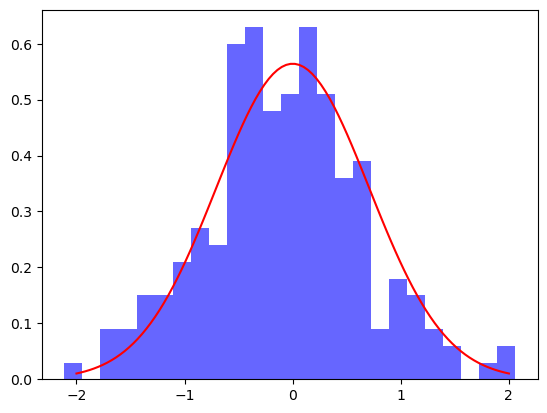

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,0.5)200.csv", header = None)
d = np.asarray(dataset.iloc[:,0])
plt.hist(d, bins=25, density=True, alpha=0.6, color='b')

mu = 0.0
var = 0.5
def func(x):
    return 1/(np.sqrt(2*np.pi*var))*np.exp(-x**2)

x_vals = np.linspace(-2, 2, 100)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, color='r', linestyle='-')
plt.show()


In [7]:
import pandas as pd
import numpy as np
import sympy as sp

import os
os.chdir('/home/pl61/density-regression/deep-symbolic-optimization/dso')

from dso.kernels import (
    PolynomialKernel,
    GaussianKernel,
    LaplacianKernel,
    InverseMultiQuadraticKernel,
    SteinKernel,
    DSOSteinKernel
)
from dso.discrepancies import MaximumMeanDiscrepancy, KernelSteinDiscrepancy, DSOKernelSteinDiscrepancy

dataset = pd.read_csv("/home/pl61/density-regression/deep-symbolic-optimization/dso/data/N(0,1)200.csv", header = None)
d = np.asarray(dataset.iloc[:,0])

x = sp.symbols('x')
density = sp.exp(-x**2)

gaussian_kernel = GaussianKernel(sigma=0.01) 
DSOstein_kernel = DSOSteinKernel(
    kernel=gaussian_kernel,
    distribution=density
)
DSOksd = DSOKernelSteinDiscrepancy(DSO_stein_kernel = DSOstein_kernel)
y = d.reshape(-1, 1)
DSOksd.compute(y)

DeviceArray(0.00669618, dtype=float32)